# TOC

 - [Simple Example](0-simple-example.ipynb)
 - [Simple Example Symbolic](1-simple-example-symblic.ipynb)

In [1]:
import astunparse

from moa.frontend import parse
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.dnf import reduce_to_dnf
from moa.onf import reduce_to_onf
from moa.backend import generate_python_source

# Frontend

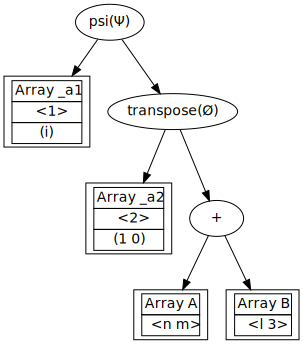

In [2]:
symbol_table, tree = parse('<i> psi (<1 0> tran(A ^ <n m> + B ^ <l 3>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

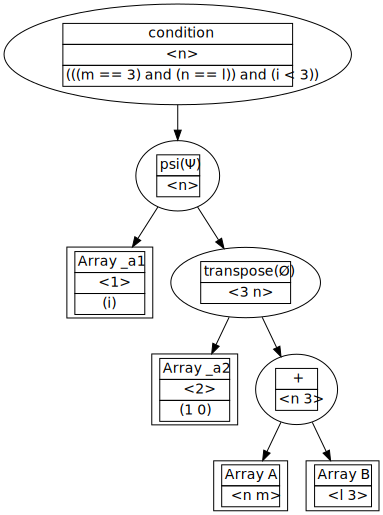

In [3]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction to Denotational Normalized Format (DNF)

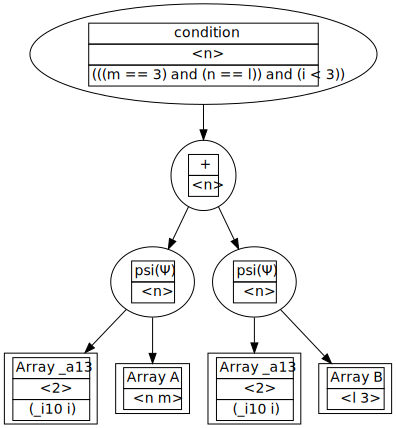

In [4]:
dnf_symbol_table, dnf_tree = reduce_to_dnf(shape_symbol_table, shape_tree)
visualize_ast(dnf_symbol_table, dnf_tree)

# Reduction to ONF

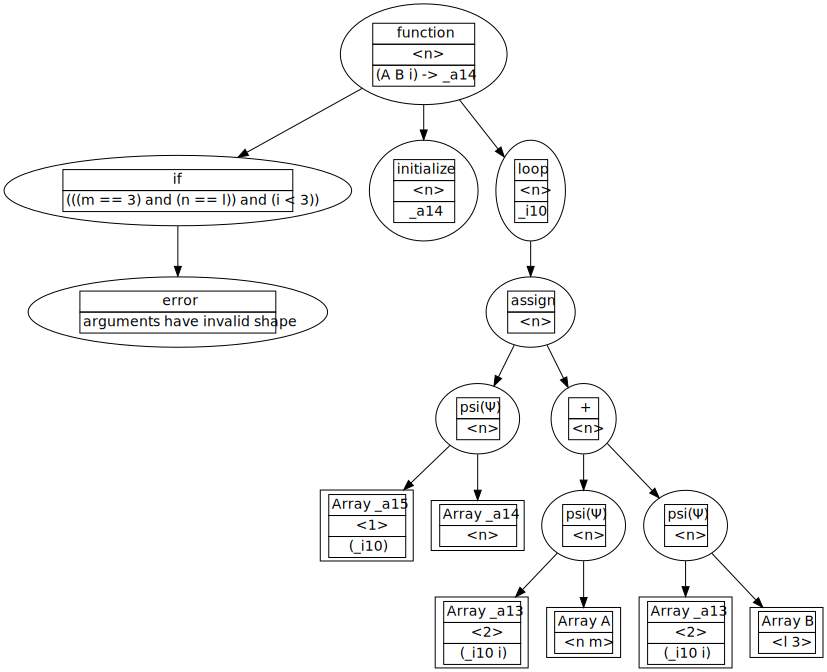

In [5]:
onf_symbol_table, onf_tree = reduce_to_onf(dnf_symbol_table, dnf_tree)
visualize_ast(onf_symbol_table, onf_tree)

# Backend (Python)

Execute generated python source.

Condition statements are not rendered yet to python source.

In [6]:
source = generate_python_source(onf_symbol_table, onf_tree, materialize_scalars=True)
print(source)



def f(A, B, i):
    
    pass
    
    _a14 = Array((n,))
    
    for _i10 in range(0, n):
        
        _a14[(_i10,)] = (A[(_i10, i)] + B[(_i10, i)])
    return _a14


In [7]:
exec(source)

In [8]:
from moa.array import Array

In [9]:
A = Array((2, 3), (1, 2, 3, 4, 5, 6))
B = Array((2, 3), (7, 8, 9, 10, 11, 12))

array = f(i=0, A=A, B=B)

NameError: name 'n' is not defined

In [11]:
array.shape

(2,)

In [12]:
array.value

[8, 14]